# Trying some fast gp

In [39]:
import os 
import sys
import pandas as pd 
import numpy as np
import glob

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [72]:
#os.listdir('task_store/')
fns_or = glob.glob('task_store/ORmogp*068422*')
fns_mo = glob.glob('task_store/mogp*')

#fns = glob.glob('task_store/mogp*')
print(fns_or)
print(fns_mo)


['task_store/ORmogp_experiment_job_4068422_task_3_cleveland.csv', 'task_store/ORmogp_experiment_job_4068422_task_1_ionosphere.csv', 'task_store/ORmogp_experiment_job_4068422_task_2_mammo_graphic.csv', 'task_store/ORmogp_experiment_job_4068422_task_4_wisconsin.csv']
['task_store/mogp_experiment_job_4067512_task_4_wisconsin.csv', 'task_store/mogp_experiment_job_4067512_task_3_cleveland.csv', 'task_store/mogp_experiment_job_4067512_task_1_ionosphere.csv', 'task_store/mogp_experiment_job_4067512_task_2_mammo_graphic.csv']


In [73]:
results = {}
for fns in [fns_or, fns_mo]:
    for fn in fns:
        results[fn] = pd.read_csv(f'{fn}', index_col=False)
#results['task_store/mogp_experiment_job_4067500_task_1_ionosphere.csv']

In [58]:
for fn in fns:
    # Building a summary over test and training. Each bar is a different seed 
    results_ion = results[fn]
    
    training_acc = results_ion[results_ion['member_generation'] == False]
    training_acc = training_acc[training_acc['training'] == True]['full_acc'].to_numpy()
    training_acc = training_acc.sum() / training_acc.shape[0]

    test_acc = results_ion[results_ion['member_generation'] == False]
    test_acc = test_acc[test_acc['training'] == False]['full_acc'].to_numpy()
    test_acc = test_acc.sum() / test_acc.shape[0]
    
    print(f'{fn}')
    print(f'Training acc = {training_acc}')
    print(f'Test acc = {test_acc} \n')

task_store/ORmogp_experiment_job_4068422_task_3_cleveland.csv
Training acc = 0.808695652173913
Test acc = 0.7911111111111111 

task_store/ORmogp_experiment_job_4068422_task_1_ionosphere.csv
Training acc = 0.8659863945578234
Test acc = 0.8408805031446539 

task_store/ORmogp_experiment_job_4068422_task_2_mammo_graphic.csv
Training acc = 0.8052208835341365
Test acc = 0.7955823293172691 

task_store/ORmogp_experiment_job_4068422_task_4_wisconsin.csv
Training acc = 0.9663877266387727
Test acc = 0.955609756097561 



# First looking at TPR vs TNR for each dataset

In [87]:
def full_extent(ax, pad=0.0):
    """Get the full extent of an axes, including axes labels, tick labels, and
    titles."""
    # For text objects, we need to draw the figure first, otherwise the extents
    # are undefined.
    ax.figure.canvas.draw()
    items = ax.get_xticklabels() + ax.get_yticklabels() 
#    items += [ax, ax.title, ax.xaxis.label, ax.yaxis.label]
    items += [ax, ax.title]
    bbox = Bbox.union([item.get_window_extent() for item in items])

    return bbox.expanded(1.0 + pad, 1.0 + pad)

### Training

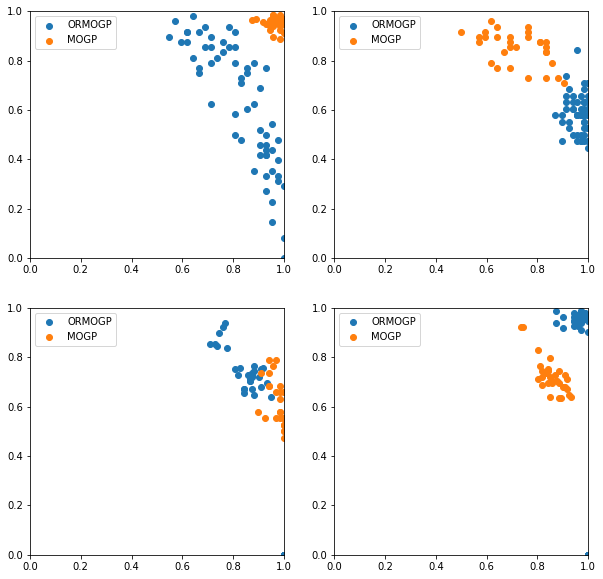

In [95]:
from matplotlib.transforms import Bbox

fig, axs = plt.subplots(2, 2, figsize=(10,10))

ind = [[0,0],[0,1],[1,0],[1,1]]
for j,fns in enumerate([fns_or, fns_mo]):
    legend = ['ORMOGP','MOGP']
    for i,fn in enumerate(fns):
        ax = axs[ind[i][0], ind[i][1]]
        df = results[fn]
        df = df.loc[df['training'] == False ]
        line = ax.scatter(df['majority_acc'].to_numpy(), df['minority_acc'].to_numpy())#, color='green')
        line.set_label('Label via method')
        ax.legend(legend)
        #ax.set_title(fn.replace('csv','').replace('task_store','').replace('_experiment_job_', ''))
        ax.set_xlim(0,1)
        ax.set_ylim(0,1)
        if j == 1: # change to be last model
            extent = full_extent(ax).transformed(fig.dpi_scale_trans.inverted())
            fig.savefig(f'data/graphs/testtprtnr_{fn.replace(".csv","").replace("task_store/","")}.png', bbox_inches=extent)

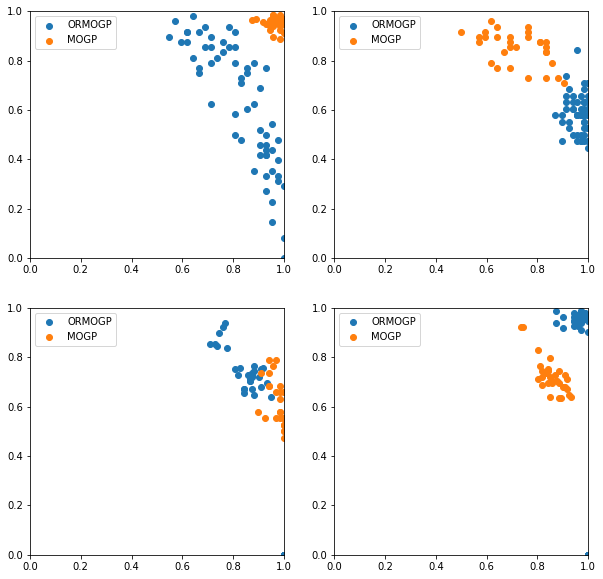

In [92]:
from matplotlib.transforms import Bbox

fig, axs = plt.subplots(2, 2, figsize=(10,10))

ind = [[0,0],[0,1],[1,0],[1,1]]
for j,fns in enumerate([fns_or, fns_mo]):
    legend = ['ORMOGP','MOGP']
    for i,fn in enumerate(fns):
        ax = axs[ind[i][0], ind[i][1]]
        df = results[fn]
        df = df.loc[df['training'] == False ]
        line = ax.scatter(df['majority_acc'].to_numpy(), df['minority_acc'].to_numpy())#, color='green')
        line.set_label('Label via method')
        ax.legend(legend)
        #ax.set_title(fn.replace('csv','').replace('task_store','').replace('_experiment_job_', ''))
        ax.set_xlim(0,1)
        ax.set_ylim(0,1)

        
extent = full_extent(ax).transformed(fig.dpi_scale_trans.inverted())
fig.savefig(f'data/graphs/testtprtnr_{fn.replace(".csv","").replace("task_store/","")}.png', bbox_inches=extent)

### Test

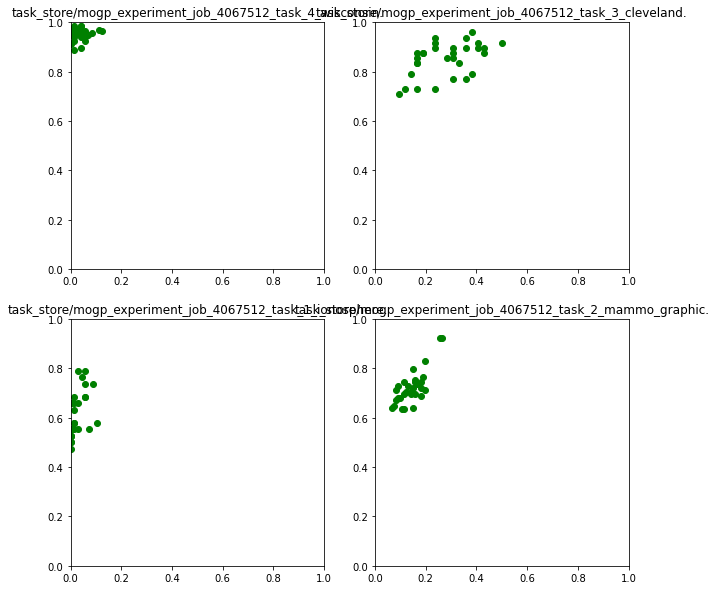

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))

ind = [[0,0],[0,1],[1,0],[1,1]]
for i,fn in enumerate(fns):
    ax = axs[ind[i][0], ind[i][1]]
    df = results[fn]
    df = df.loc[df['training'] == False]
    ax.scatter(1 - df['majority_acc'].to_numpy(), df['minority_acc'].to_numpy(), color='green')
    ax.set_title(fn.replace('csv',''))
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)

# How long were run times?

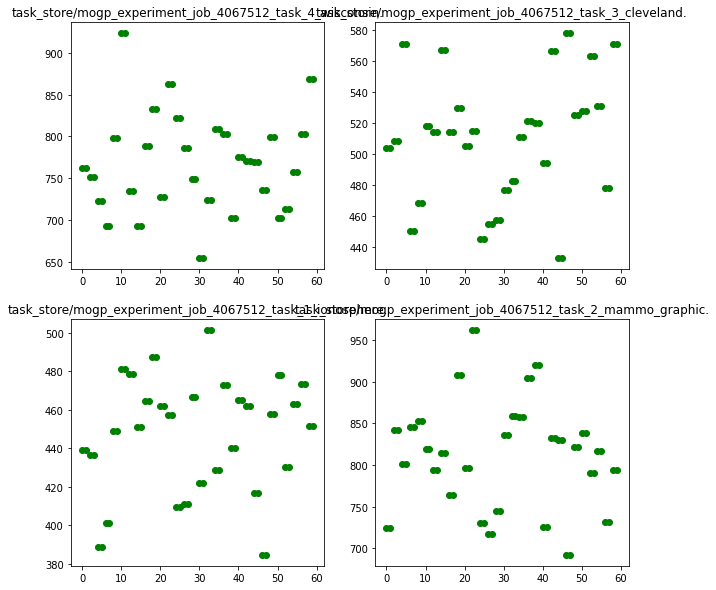

In [19]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))

ind = [[0,0],[0,1],[1,0],[1,1]]
for i,fn in enumerate(fns):
    ax = axs[ind[i][0], ind[i][1]]
    df = results[fn]
    ax.scatter(np.arange(len(df)), df['time'].to_numpy(), color='green')
    ax.set_title(fn.replace('csv',''))

# Code Architechture 

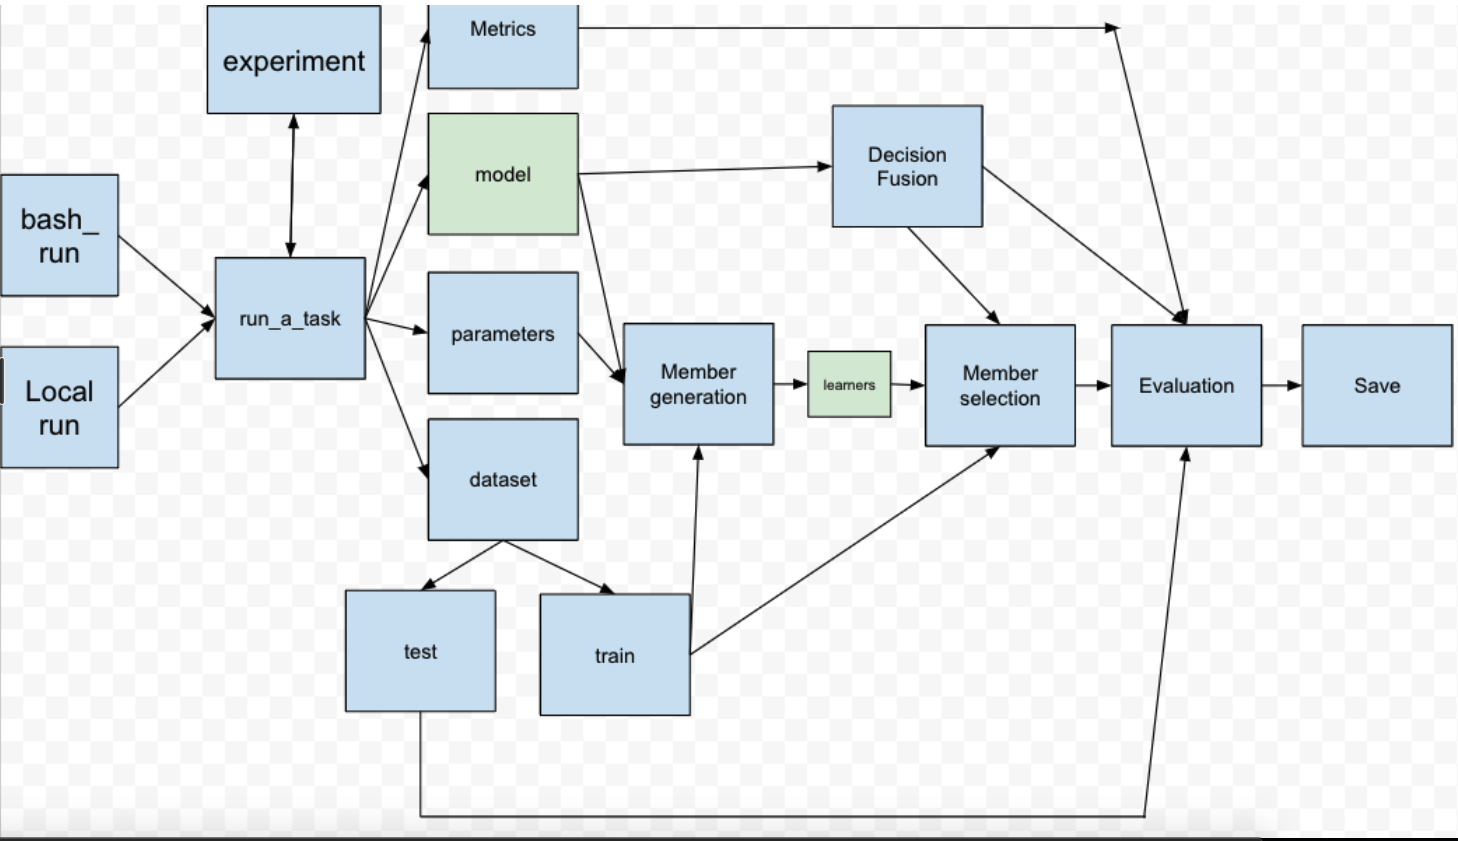

# Questions for the meeting.
- Based on this GP experiment, what ammendments need to be made? What visualisations should we aim for, learning curves, etc. 
    - More datasets?
- Things we try.
    - NEw objective function + full acc
    - New objective function + acc PER CLASS
  
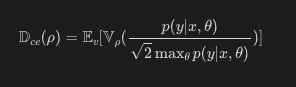

# MOGP results. Like to look at the results and version history

In [20]:
def df_avg_to_np(df):
    r = []
    for x in df['avg']:
        f1 = float(''.join(x.split()[0].replace('[','').split()))
        f2 = float(''.join(x.split()[1].replace(']','').split()))
        r.append([f1,f2])
    return np.array(r)
        

In [21]:
glb = glob.glob('task_store/*history*')
glb[0]

'task_store/history_24_mogp_experiment_job_4067512_task_2_mammo_graphic.csv'

In [22]:
n_tasks = 4
for i in range(1,n_tasks+1,1): # for each task
    glb = glob.glob(f'task_store/history_*_OR*task_{i}_*')  # collect all histories
    print(glb)
    avgs = np.zeros((51,2))
    for gl in glb: # go through each history
        df = pd.read_csv(gl)
        avgs += df_avg_to_np(df)
    
    # average over generations 
    avgs = avgs / len(glb)

    # graph generations 
    fig, axs = plt.subplots(1, 2, figsize=(10,10))
    axs[0].plot(np.arange(avgs.shape[0]), avgs[:,0], color='green')
    axs[1].plot(np.arange(avgs.shape[0]), avgs[:,1], color='green')



['task_store/history_24_ORmogp_experiment_job_4068422_task_1_ionosphere.csv', 'task_store/history_22_ORmogp_experiment_job_4068422_task_1_ionosphere.csv', 'task_store/history_26_ORmogp_experiment_job_4068194_task_1_ionosphere.csv', 'task_store/history_28_ORmogp_experiment_job_4068422_task_1_ionosphere.csv', 'task_store/history_20_ORmogp_experiment_job_4068194_task_1_ionosphere.csv', 'task_store/history_25_ORmogp_experiment_job_4068422_task_1_ionosphere.csv', 'task_store/history_23_ORmogp_experiment_job_4068422_task_1_ionosphere.csv', 'task_store/history_27_ORmogp_experiment_job_4068194_task_1_ionosphere.csv', 'task_store/history_29_ORmogp_experiment_job_4068422_task_1_ionosphere.csv', 'task_store/history_21_ORmogp_experiment_job_4068194_task_1_ionosphere.csv', 'task_store/history_4_ORmogp_experiment_job_4068422_task_1_ionosphere.csv', 'task_store/history_2_ORmogp_experiment_job_4068422_task_1_ionosphere.csv', 'task_store/history_6_ORmogp_experiment_job_4068194_task_1_ionosphere.csv', '

ValueError: could not convert string to float: ''

In [ ]:
x = np.array([1,2,3])
q = np.array([1,2,3])
z = 1
print((z - x) /2)

print(x - q)

In [23]:
import random
random.seed(1)

In [24]:
import numpy as np
x = np.var(np.mean(np.random.rand(10)))
x

0.0

In [8]:
import numpy as np
x = np.mean(np.var(np.random.rand(10)))
x

0.066991262977315

In [27]:
a = np.array([1,2,3,4,5,6,7,8,9,10])
b = np.ones((6,10))
print(a.shape)
print(b.shape)
print(b - a)
print(a - b)

(10,)
(6, 10)
[[ 0. -1. -2. -3. -4. -5. -6. -7. -8. -9.]
 [ 0. -1. -2. -3. -4. -5. -6. -7. -8. -9.]
 [ 0. -1. -2. -3. -4. -5. -6. -7. -8. -9.]
 [ 0. -1. -2. -3. -4. -5. -6. -7. -8. -9.]
 [ 0. -1. -2. -3. -4. -5. -6. -7. -8. -9.]
 [ 0. -1. -2. -3. -4. -5. -6. -7. -8. -9.]]
[[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
 [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
 [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
 [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
 [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
 [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]]


In [33]:
x = np.ones((245))
y = np.ones((245,500)).T
y - x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [35]:
x = np.arange(5)
x

array([0, 1, 2, 3, 4])

In [36]:
np.repeat(x)

TypeError: _repeat_dispatcher() missing 1 required positional argument: 'repeats'

In [46]:
c = np.array([[1,0],[2,0],[3,0],[4,0,],[5,0]])

q = np.tile(c,(4,1,1))

print(c.shape)
print(q.shape)


(5, 2)
(4, 5, 2)


In [53]:
def my_func(a):
    """Average first and last element of a 1-D array"""
    print(f'a:{a}')
    return (a[0] + a[-1]) * 0.5

b = np.array([[1,2,3], [4,5,6], [7,8,9]])
print(b.shape)
print(b)
b1=np.apply_along_axis(my_func, 0, b)
print(b1)
b2=np.apply_along_axis(my_func, 1, b)
print(b2)

(3, 3)
[[1 2 3]
 [4 5 6]
 [7 8 9]]
a:[1 4 7]
a:[2 5 8]
a:[3 6 9]
[4. 5. 6.]
a:[1 2 3]
a:[4 5 6]
a:[7 8 9]
[2. 5. 8.]


In [57]:
x = np.array([1,2,3])
y = np.array([[1,2,3],[4,5,6]])
x-y

array([[ 0,  0,  0],
       [-3, -3, -3]])

In [60]:
x = np.random.rand(5,5)
y = np.random.rand(5,5)
(x - y).shape

(5, 5)

In [90]:
x = np.ones((3,5)).reshape(5,3,1)
y = np.ones((3,5)) * 2
z = (x - y)
(x - y).shape

(5, 3, 5)

In [85]:
x

array([[[1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.]]])

In [86]:
y

array([[2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2.]])

In [87]:
z

array([[[-1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1.]],

       [[-1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1.]],

       [[-1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1.]],

       [[-1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1.]],

       [[-1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1.]]])

In [79]:
y - x

ValueError: operands could not be broadcast together with shapes (3,6) (3,5) 

In [89]:
q = np.ones((5,5))
q[q == q] = 0 
q

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [101]:
y = np.array([1,2,3])
np.tile(y, (10,1)).shape

(10, 3)